<a href="https://colab.research.google.com/github/dhruv-gambhir/SC1015-Project/blob/main/dsai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math, nltk, warnings
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
import warnings; warnings.simplefilter('ignore')

In [ ]:
import matplotlib as fig

In [ ]:
def upload_mov(trace):
    data = pd.read_csv(trace)
    data['release_date'] = pd.to_datetime(data['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries',
                    'production_companies', 'spoken_languages']
    for variables in json_columns:
        data[variables] = data[variables].apply(json.loads)
    return data

In [ ]:
def upload_cred(trace):
    data = pd.read_csv(trace)
    json_columns = ['cast', 'crew']
    for variables in json_columns:
        data[variables] = data[variables].apply(json.loads)
    return data

In [ ]:
lost_variables = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'color',
    'cast_total_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'director_facebook_likes',
    'content_rating',
    'facenumber_in_poster',
    'num_critic_for_reviews',
    'movie_imdb_link',
    'movie_facebook_likes',
    'num_user_for_reviews']

In [ ]:
Conversion_t_to_i = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'revenue',
    'title': 'title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'keywords',
    'vote_count': 'num_voted_users'}

Remap = {'imdb_score': 'vote_average'}
#_____________________________________________________
def access(holder, index):
    given = holder
    try:
        for inx in index:
            given = given[inx]
        return given
    except IndexError or KeyError:
        return pd.np.nan
def director(crew_info):
    drects = [i['name'] for i in crew_info if i['job'] == 'Director']
    return access(drects, [0])
#_____________________________________________________
def pipe_flat_names(kake):
    return '|'.join([i['name'] for i in kake])
#_____________________________________________________
def convert_to_original_format(mie, cdr):
    t_mie = mie.copy()
    t_mie.rename(columns=Conversion_t_to_i, inplace=True)
    t_mie['title_year'] = pd.to_datetime(t_mie['release_date']).apply(lambda x: x.year)
    t_mie['country'] = t_mie['production_countries'].apply(lambda x: access(x, [0, 'name']))
    t_mie['language'] = t_mie['spoken_languages'].apply(lambda x: access(x, [0, 'name']))
    t_mie['director_name'] = cdr['crew'].apply(director)
    t_mie['actor_1_name'] = cdr['cast'].apply(lambda x: access(x, [1, 'name']))
    t_mie['actor_2_name'] = cdr['cast'].apply(lambda x: access(x, [2, 'name']))
    t_mie['actor_3_name'] = cdr['cast'].apply(lambda x: access(x, [3, 'name']))
    t_mie['genres'] = t_mie['genres'].apply(pipe_flat_names)
    t_mie['keywords'] = t_mie['keywords'].apply(pipe_flat_names)
    return t_mie

In [ ]:
pip install fuzzywuzzy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math, nltk, warnings
from nltk.corpus import wordnet
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings('ignore')
PS = nltk.stem.PorterStemmer()
cdr = upload_cred("/content/drive/MyDrive/tmdb_5000_credits.csv")
mie = upload_mov("/content/drive/MyDrive/tmdb_5000_movies.csv")
df_initial = convert_to_original_format(mie, cdr)
print('Shape:',df_initial.shape)
table_value=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
table_value=table_value.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
table_value=table_value.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
table_value

Shape: (4803, 26)


,budget,genres,homepage,id,keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,duration,spoken_languages,status,tagline,title,vote_average,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name
column type,int64,object,object,int64,object,object,object,object,float64,object,object,object,int64,float64,object,object,object,object,float64,int64,float64,object,object,object,object,object
null values,0,0,3091,0,0,86,0,3,0,0,0,1,0,2,0,0,844,0,0,0,1,174,30,53,63,93
null values (%),0.0,0.0,64.355611,0.0,0.0,1.790548,0.0,0.062461,0.0,0.0,0.0,0.02082,0.0,0.041641,0.0,0.0,17.572351,0.0,0.0,0.0,0.02082,3.622736,0.62461,1.103477,1.31168,1.93629


In [ ]:
setting_kw = set()
for listing_kw in df_initial['keywords'].str.split('|').values:
    if isinstance(listing_kw, float): continue  
    setting_kw = setting_kw.union(listing_kw)
setting_kw.remove('')

In [ ]:
#Fucntion to count the occurence 
def word_quantity(data, reference, listing):
    kw_number = dict()
    for s in listing: kw_number[s] = 0
    for listing_kw in data[reference].str.split('|'):        
        if type(listing_kw) == float and pd.isnull(listing_kw): continue        
        for s in [s for s in listing_kw if s in listing]: 
            if pd.notnull(s): kw_number[s] += 1
    keyword_numbers = []
    for k,v in kw_number.items():
        keyword_numbers.append([k,v])
    keyword_numbers.sort(key = lambda x:x[1], reverse = True)
    return keyword_numbers, kw_number

In [ ]:
#Keywords and thei number of occurences
keyword_numbers, dum = word_quantity(df_initial, 'keywords', setting_kw)
keyword_numbers[:25]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189],
 ['aftercreditsstinger', 170],
 ['violence', 150],
 ['dystopia', 139],
 ['sport', 126],
 ['revenge', 118],
 ['sex', 111],
 ['friendship', 106],
 ['biography', 105],
 ['musical', 105],
 ['teenager', 99],
 ['3d', 98],
 ['love', 95],
 ['sequel', 94],
 ['suspense', 92],
 ['new york', 89],
 ['police', 84],
 ['los angeles', 81],
 ['high school', 80],
 ['alien', 76],
 ['prison', 72]]

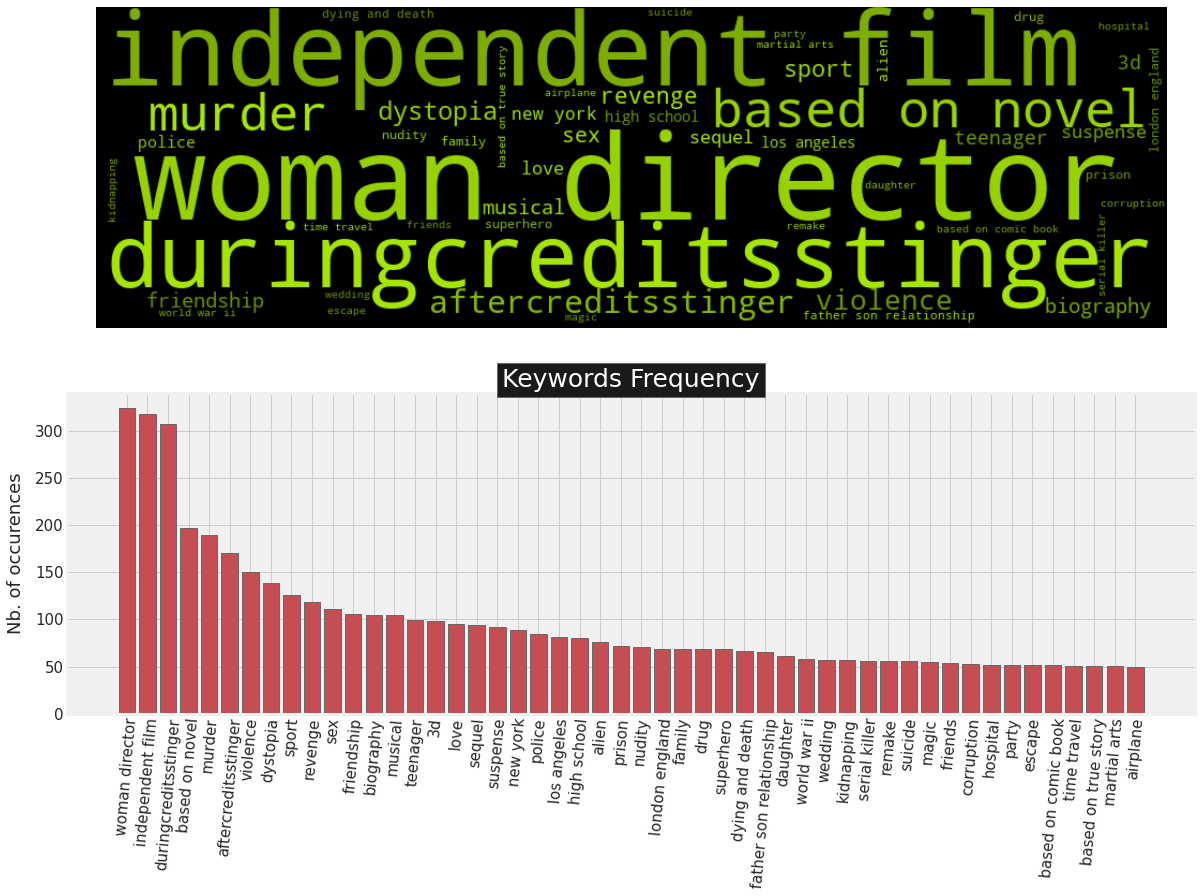

In [ ]:
def random_colour(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)

words = dict()
trunc_occurences = keyword_numbers[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_colour,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
# HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
#_______________________
plt.title("Keywords Frequency",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

KEYWORDS AND THEIR FREQUENCIES 

In [ ]:

genres_inn = set()
for s in df_initial['genres'].str.split('|').values:
    genres_inn = genres_inn.union(set(s))

In [ ]:
keyword_numbers, dum = word_quantity(df_initial, 'genres', genres_inn)
keyword_numbers[:25]

[['Drama', 2297],
 ['Comedy', 1722],
 ['Thriller', 1274],
 ['Action', 1154],
 ['Romance', 894],
 ['Adventure', 790],
 ['Crime', 696],
 ['Science Fiction', 535],
 ['Horror', 519],
 ['Family', 513],
 ['Fantasy', 424],
 ['Mystery', 348],
 ['Animation', 234],
 ['History', 197],
 ['Music', 185],
 ['War', 144],
 ['Documentary', 110],
 ['Western', 82],
 ['Foreign', 34],
 ['', 28],
 ['TV Movie', 8]]

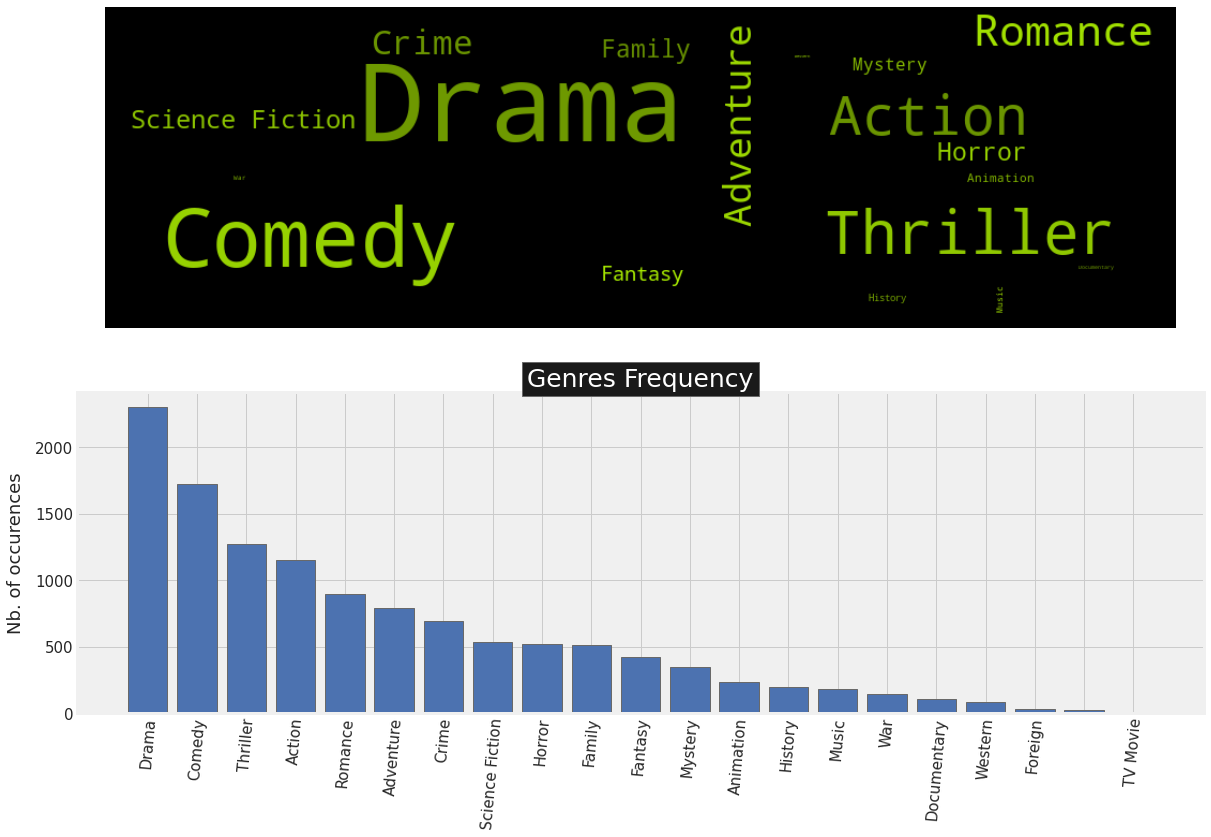

In [ ]:

fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_numbers[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_colour,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
#_____________________________________________
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='b')
#_______________________
plt.title("Genres Frequency",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

GENRES AND THEIR FREQUENICES 

In [ ]:
df_initial['decade'] = df_initial['title_year'].apply(lambda x:((x-1900)//10)*10)

def years(olo):
    return {'min':olo.min(),'max':olo.max(),'count': olo.count(),'mean':olo.mean()}
#______________________________________________________________
# Creation of a dataframe with statitical infos on each decade:
test = df_initial['title_year'].groupby(df_initial['decade']).apply(years).unstack()

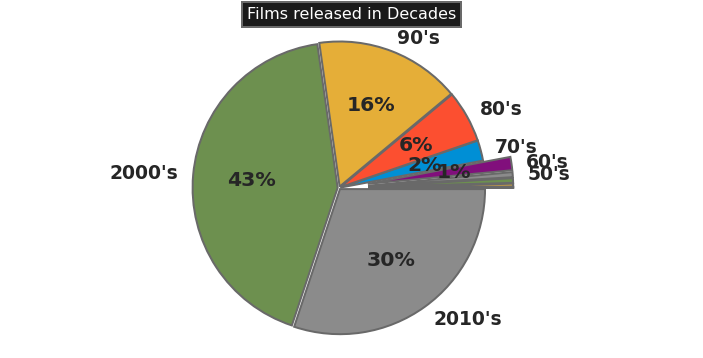

In [ ]:
sns.set_context("poster", font_scale=0.85)

def label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine
#____________________________________
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
labels = [label(s) for s in  test.index]
sizes  = test['count'].values
explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(11)]
ax.pie(sizes, explode = explode, labels=labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title('Films released in Decades',
             bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);
df_initial.drop('decade', axis=1, inplace = True)

NUMBER OF FILMS PER DECADE AND ITS DISTRIBUTION

# Data Cleaning

In [ ]:
import nltk
from nltk import *
from nltk.corpus import wordnet
!pip install wordnet
from nltk.stem import PorterStemmer
PS = nltk.stem.PorterStemmer()
nltk.download('wordnet', '/usr/share/nltk_data')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_clean = df_initial

In [ ]:
#We now group keywords with similar roots into one category

def keywords_formatting(data, col = 'keywords'):
    PS = nltk.stem.PorterStemmer()
    roots  = dict()   
    selected = dict()  #associations of keywords roots to a category
    category = []
    count = 0
    for s in data[col]:
        if pd.isnull(s): continue
        for word in s.split('|'):
            word = word.lower() ; r = PS.stem(word)
            if r in roots:                
                roots[r].add(word)
            else:
                roots[r] = {word}
    
    for s in roots.keys():
        if len(roots[s]) > 1:  
            min_length = 1000
            for k in roots[s]:
                if len(k) < min_length:
                    cat = k ; min_length = len(k)            
            category.append(cat)
            selected[s] = cat
        else:
            category.append(list(roots[s])[0])
            selected[s] = list(roots[s])[0]
                   
    print("Number of keywords in variable '{}': {}".format(col,len(category)))
    return category, roots, selected

In [ ]:
keywords, roots, selected = keywords_formatting(df_clean, col = 'keywords')

Number of keywords in variable 'keywords': 9474


In [ ]:
# Plot of similar keywords
count = 0
for s in roots.keys():
    if len(roots[s]) > 1: 
        count += 1
        if count < 15: print(count, roots[s], len(roots[s]))

1 {'alien', 'alienation'} 2
2 {'spy', 'spying'} 2
3 {'vigilante', 'vigilantism'} 2
4 {'terrorism', 'terror'} 2
5 {'flooding', 'flood'} 2
6 {'spider', 'spiders'} 2
7 {'horse', 'horses'} 2
8 {'music', 'musical'} 2
9 {'animal', 'anime', 'animation'} 3
10 {'compassion', 'compass'} 2
11 {'training', 'train'} 2
12 {'sail', 'sailing'} 2
13 {'time travel', 'time traveler'} 2
14 {'orc', 'orcs'} 2


In [ ]:
#Replace the keywords with same roots by one main keyword. 

def replace_keywords(df, association, roots = False):
    df_new = df.copy(deep = True)
    for index, row in df_new.iterrows():
        kwords = row['keywords']
        if pd.isnull(kwords): continue
        new_keywords = []
        for s in kwords.split('|'): 
            t = PS.stem(s) if roots else s
            if t in association.keys():
               new_keywords.append(association[t])
            else:
               new_keywords.append(s)       
        df_new.at[index, 'keywords'] = '|'.join(map(str, new_keywords)) 
    return df_new

In [ ]:
df_keywords_cleaned = replace_keywords(df_clean, selected, roots = True)

In [ ]:
keyword_numbers, keywords_count = word_quantity(df_clean,'keywords',keywords)
keyword_numbers[:5]

[['', 412],
 ['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197]]

[['', 412],
 ['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197]]

Group by synonyms

We replace keywords occuring less than five times with a synonym

In [ ]:
#we get synonymes of words from wordnet using synsets

def get_synonymes(word):
    synonyms = set()
    for s in wordnet.synsets(word):
        for w in s.lemma_names():
           
            index = s.name().find('.')+1
            if s.name()[index] == 'n': synonyms.add(w.lower().replace('_',' '))
    return synonyms

In [ ]:
# Example of a list of synonyms given by NLTK

word = 'fight'
synonyms = get_synonymes(word)
for s in synonyms:
    print(' "{:<20}" in keywords list -> {} {}'.format(s, s in keywords,
                                                keywords_count[s] if s in keywords else 0 ))

 "fight               " in keywords list -> True 47
 "conflict            " in keywords list -> True 1
 "battle              " in keywords list -> True 31
 "combat              " in keywords list -> True 10
 "competitiveness     " in keywords list -> False 0
 "scrap               " in keywords list -> False 0
 "fighting            " in keywords list -> False 0
 "engagement          " in keywords list -> False 0
 "fight               " in keywords list -> True 47
 "conflict            " in keywords list -> True 1
 "battle              " in keywords list -> True 31
 "combat              " in keywords list -> True 10
 "competitiveness     " in keywords list -> False 0
 "scrap               " in keywords list -> False 0
 "fighting            " in keywords list -> False 0
 "engagement          " in keywords list -> False 0


In [ ]:
# check if 'word' is a key of 'key_count' with a test on the number of occurences   

def test_keyword(word, key_count, threshold):
    return (False , True)[key_count.get(word, 0) >= threshold]

In [ ]:
# Now we replace keywords with higher frequency words

keyword_numbers.sort(key = lambda x:x[1], reverse = False)
key_count = dict()
for s in keyword_numbers:
    key_count[s[0]] = s[1]

replacement_word = dict()
count = 0
for index, [word, nb_apparitions] in enumerate(keyword_numbers):
    if nb_apparitions > 5: continue  # only the keywords that appear less than 5 times
    synonym = get_synonymes(word)
    if len(synonym) == 0: continue     # case of the plurals
    #_________________________________________________________________
    list_word = [(s, key_count[s]) for s in synonym 
                  if test_keyword(s, key_count, key_count[word])]
    list_word.sort(key = lambda x:(x[1],x[0]), reverse = True)    
    if len(list_word) <= 1: continue       # no replacement
    if word == list_word[0][0]: continue    # replacement by himself
    count += 1
    if  count < 8:
        print('{:<12} -> {:<12} (init: {})'.format(word, list_word[0][0], list_word))    
    replacement_word[word] = list_word[0][0]

print(90*'_'+'\n'+'The replacement concerns {}% of the keywords.'
      .format(round(len(replacement_word)/len(keywords)*100,2)))

narcism      -> narcissism   (init: [('narcissism', 1), ('narcism', 1)])
apparition   -> phantom      (init: [('phantom', 3), ('shadow', 1), ('apparition', 1)])
sail         -> cruise       (init: [('cruise', 3), ('sail', 1)])
macao        -> macau        (init: [('macau', 1), ('macao', 1)])
universe     -> existence    (init: [('existence', 2), ('world', 1), ('universe', 1), ('creation', 1)])
regent       -> trustee      (init: [('trustee', 1), ('regent', 1)])
human        -> human being  (init: [('human being', 5), ('human', 1)])
__________________________________________________________________________________________
The replacement concerns 6.12% of the keywords.
narcism      -> narcissism   (init: [('narcissism', 1), ('narcism', 1)])
apparition   -> phantom      (init: [('phantom', 3), ('shadow', 1), ('apparition', 1)])
sail         -> cruise       (init: [('cruise', 3), ('sail', 1)])
macao        -> macau        (init: [('macau', 1), ('macao', 1)])
universe     -> existence    (

In [ ]:
print('Keywords that appear both in keys and values:'.upper()+'\n'+45*'-')
count = 0
for s in replacement_word.values():
    if s in replacement_word.keys():
        count += 1
        if count < 10: print('{:<20} -> {:<20}'.format(s, replacement_word[s]))

for key, value in replacement_word.items():
    if value in replacement_word.keys():
        replacement_word[key] = replacement_word[value] 

KEYWORDS THAT APPEAR BOTH IN KEYS AND VALUES:
---------------------------------------------
failure              -> loser               
leech                -> parasite            
office               -> power               
office               -> power               
carnival             -> circus              
pit                  -> hell                
drawing              -> lottery             
twist                -> crook               
pest                 -> plague              
KEYWORDS THAT APPEAR BOTH IN KEYS AND VALUES:
---------------------------------------------
failure              -> loser               
leech                -> parasite            
office               -> power               
office               -> power               
carnival             -> circus              
pit                  -> hell                
drawing              -> lottery             
twist                -> crook               
pest                 -> plague              


In [ ]:
# replacement of keyword varieties by the main keyword

df_keywords_synonyms = replace_keywords(df_keywords_cleaned, replacement_word, roots = False)   
kw, keywords_roots, keywords_select = keywords_formatting(df_keywords_synonyms, col = 'keywords')

Number of keywords in variable 'keywords': 8897
Number of keywords in variable 'keywords': 8897


In [ ]:
kw.remove('')
new_keyword_numbers, keywords_count = word_quantity(df_keywords_synonyms,
                                                    'keywords',keywords)
new_keyword_numbers[:5]

[['', 412],
 ['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197]]

[['', 412],
 ['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197]]

In [ ]:
def delete_low_fq(df, keyword_numbers):
    df_new = df.copy(deep = True)
    key_count = dict()
    for s in keyword_numbers: 
        key_count[s[0]] = s[1]    
    for index, row in df_new.iterrows():
        kwords = row['keywords']
        if pd.isnull(kwords): continue
        new_keywords = []
        for s in kwords.split('|'): 
            if key_count.get(s, 4) > 3: new_keywords.append(s)
        df_new.at[index, 'keywords'] = '|'.join(map(str, new_keywords))
    return df_new

In [ ]:
# Creation of a dataframe where keywords of low frequencies are suppressed

df_keywords_occurence = delete_low_fq(df_keywords_synonyms, new_keyword_numbers)
keywords, roots, selected = keywords_formatting(df_keywords_occurence, col = 'keywords') 

Number of keywords in variable 'keywords': 2109
Number of keywords in variable 'keywords': 2109


In [ ]:
keywords.remove('')
new_keyword_numbers, keywords_count = word_quantity(df_keywords_occurence,
                                                    'keywords',keywords)
new_keyword_numbers[:5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 197]]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 197]]

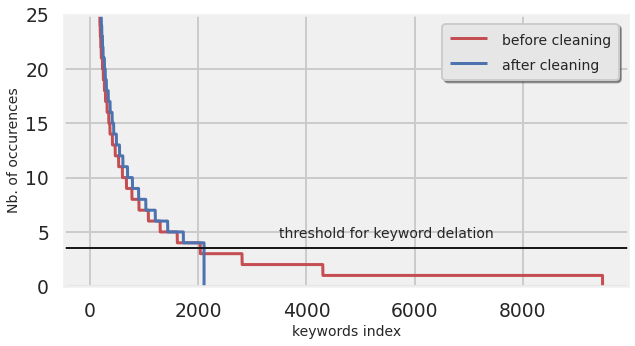

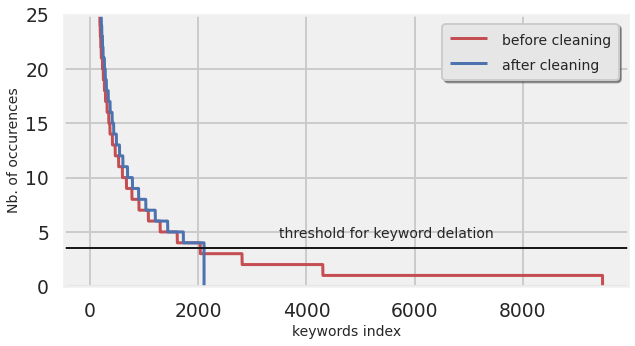

In [ ]:
# Graph of keyword occurences before and after cleaning

font = {'family' : 'ariel', 'weight' : 'normal', 'size'   : 14}
mpl.rc('font', **font)

keyword_numbers.sort(key = lambda x:x[1], reverse = True)

y_axis = [i[1] for i in keyword_numbers]
x_axis = [k for k,i in enumerate(keyword_numbers)]

new_y_axis = [i[1] for i in new_keyword_numbers]
new_x_axis = [k for k,i in enumerate(new_keyword_numbers)]

f, ax = plt.subplots(figsize=(9, 5))
ax.plot(x_axis, y_axis, 'r-', label='before cleaning')
ax.plot(new_x_axis, new_y_axis, 'b-', label='after cleaning')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('medium')
            
plt.ylim((0,25))
plt.axhline(y=3.5, linewidth=2, color = 'k')
plt.xlabel("keywords index", family='ariel', fontsize = 14)
plt.ylabel("Nb. of occurences", family='ariel', fontsize = 14)
plt.text(3500, 4.5, 'threshold for keyword delation', fontsize = 14)
plt.show()

In [ ]:
df_var_cleaned = df_keywords_occurence.copy(deep = True)

missing values

We examine the number of missong values in the data and then use different methods to fill in 

In [ ]:
df_filling = df_var_cleaned.copy(deep=True)
missing_year_info = df_filling[df_filling['title_year'].isnull()][[
            'director_name','actor_1_name', 'actor_2_name', 'actor_3_name']]
missing_year_info[:10]

,director_name,actor_1_name,actor_2_name,actor_3_name
4553,NaN,NaN,NaN,NaN


,director_name,actor_1_name,actor_2_name,actor_3_name
4553,NaN,NaN,NaN,NaN


In [ ]:
df_filling.iloc[4553]

budget                                                                  0
genres                                                                   
homepage                                                              NaN
id                                                                 380097
keywords                                                                 
language                                                              NaN
original_title                                 America Is Still the Place
overview                1971 post civil rights San Francisco seemed li...
popularity                                                            0.0
production_companies                                                   []
production_countries                                                   []
release_date                                                          NaT
revenue                                                                 0
duration                              

In [ ]:
def fill_year(df):
    col = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']
    usual_year = [0 for _ in range(4)]
    var        = [0 for _ in range(4)]
    
    for i in range(4):
        usual_year[i] = df.groupby(col[i])['title_year'].mean()
    
    actor_year = dict()
    for i in range(4):
        for s in usual_year[i].index:
            if s in actor_year.keys():
                if pd.notnull(usual_year[i][s]) and pd.notnull(actor_year[s]):
                    actor_year[s] = (actor_year[s] + usual_year[i][s])/2
                elif pd.isnull(actor_year[s]):
                    actor_year[s] = usual_year[i][s]
            else:
                actor_year[s] = usual_year[i][s]
        
   
    missing_year_info = df[df['title_year'].isnull()]
   
    count_replaced = 0
    for index, row in missing_year_info.iterrows():
        value = [ np.NaN for _ in range(4)]
        count = 0 ; sum_year = 0
        for i in range(4):            
            var[i] = df.loc[index][col[i]]
            if pd.notnull(var[i]): value[i] = actor_year[var[i]]
            if pd.notnull(value[i]): count += 1 ; sum_year += actor_year[var[i]]
        if count != 0: sum_year = sum_year / count 

        if int(sum_year) > 0:
            count_replaced += 1
            df.set_value(index, 'title_year', int(sum_year))
            if count_replaced < 10: 
              print("{:<45} -> {:<20}".format(df.loc[index]['movie_title'],int(sum_year)))
    return 

In [ ]:
fill_year(df_filling)

In [ ]:
# Extracting keywords from the title

count = 0
for index, row in df_filling[df_filling['keywords'].isnull()].iterrows():
    count += 1
    word_list = row['title'].strip().split()
    new_keyword = []
    for s in word_list:
        synonym = get_synonymes(s)
        for t in list(synonym):
            if t in keywords: 
                new_keyword.append(t)                
    if new_keyword and count < 15: 
        print('{:<50} -> {:<30}'.format(row['title'], str(new_keyword)))
    if new_keyword:
        df_filling.set_value(index, 'keywords', '|'.join(new_keyword)) 

Imputing from regression

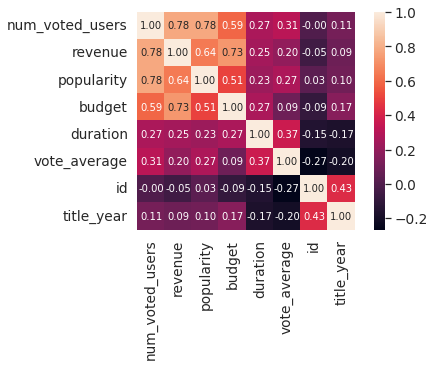

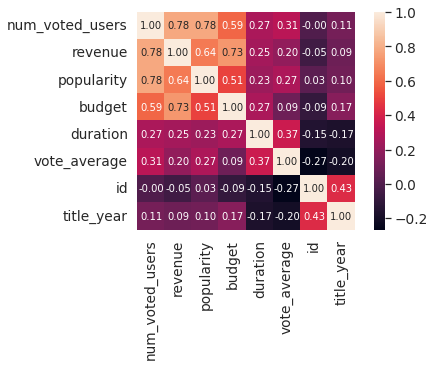

In [ ]:
corrmat = df_keywords_occurence.dropna(how='any').corr()
cols = corrmat.nlargest(9, 'num_voted_users')['num_voted_users'].index
cm = np.corrcoef(df_keywords_occurence[cols].dropna(how='any').values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We will fill variables like gross, num_critic_for_reviews, num_voted_users , and num_user_for_reviews using regression as they have some degree of correleation.

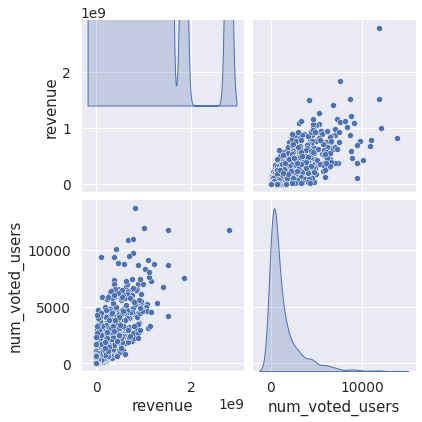

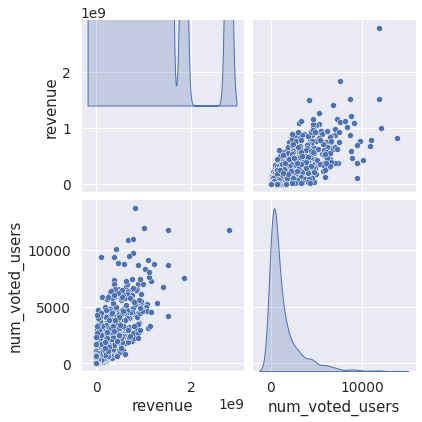

In [ ]:
# showing the relation between revenue and num_voted_users

sns.set(font_scale=1.25)
cols = ['revenue', 'num_voted_users']
sns.pairplot(df_filling.dropna(how='any')[cols],diag_kind='kde', size = 3)
plt.show();

In [ ]:
def linear_reg(df, col_to_predict, ref_col):
    regression = linear_model.LinearRegression()
    test = df[[col_to_predict,ref_col]].dropna(how='any', axis = 0)
    X = np.array(test[ref_col])
    Y = np.array(test[col_to_predict])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regression.fit(X, Y)
    
    test = df[df[col_to_predict].isnull() & df[ref_col].notnull()]
    for index, row in test.iterrows():
        value = float(regression.predict(row[ref_col]))
        df.set_value(index, col_to_predict, value)

In [ ]:
linear_reg(df_filling, 'revenue', 'num_voted_users')

In [ ]:
df = df_filling.copy(deep = True)
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] 
                                - missing_df['missing_count']) / df.shape[0] * 100
missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,country,174,96.377264
3,actor_3_name,93,98.063710
4,language,86,98.209452
5,actor_2_name,63,98.688320
6,actor_1_name,53,98.896523
7,director_name,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,country,174,96.377264
3,actor_3_name,93,98.063710
4,language,86,98.209452
5,actor_2_name,63,98.688320
6,actor_1_name,53,98.896523
7,director_name,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


In [ ]:
df = df_filling.copy(deep=True)
df.reset_index(inplace = True, drop = True)

# Recommendation Model


In [ ]:
gs_filter = lambda x,y,sum: math.exp(-(x-y)**2/(2*sum**2))

In [ ]:
def variables_at_entry(df, identification):
  columns = []
  if pd.notnull(df['director_name'].iloc[identification]):
    for i in df['director_name'].iloc[identification].split('|'):
      columns.append(i)


  
    if pd.notnull(df['actor_1_name'].iloc[identification]):
            for s in df['actor_1_name'].iloc[identification].split('|'):
                columns.append(s)
    if pd.notnull(df['actor_2_name'].iloc[identification]):
            for s in df['actor_2_name'].iloc[identification].split('|'):
                columns.append(s)         
    if pd.notnull(df['actor_3_name'].iloc[identification]):
            for s in df['actor_3_name'].iloc[identification].split('|'):
                columns.append(s)
    

  if pd.notnull(df['keywords'].iloc[identification]):
    for i in df['keywords'].iloc[identification].split('|'):
      columns.append(i)

  return columns

In [ ]:
def variables_adding(df, reference):
  for i in reference: df[i] = pd.Series([0 for _ in range(len(df))])
  cols = ['genres', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'keywords']

  for group in cols:
    for position, row in df.iterrows():
      if pd.isnull(row[group]):
        continue
      for i in row[group].split('|'):
        if i in reference:
          df.at[position, i] = 1

  return df

In [ ]:
def suggestion(df, identification):
  df_new = df.copy(deep = True)
  genres = set()
  for i in df['genres'].str.split('|').values:
    genres = genres.union(set(i))

  #Similarity check
  identifiers = variables_at_entry(df_new, identification)
  identifiers += list(genres)
  new_dataframe = variables_adding(df_new, identifiers)

  #Closest neighbours
  y = new_dataframe.iloc[identifiers].values
  neighbours = NearestNeighbors(n_neighbors = 31, algorithm = 'auto', metric = 'euclidean').fit(y)

  dis, pos = neighbours.kneighbors(y)
  ytest = new_dataframe.iloc[identification].values
  ytest = ytest.reshape(1, -1)

  dis, pos = neighbours.kneighbors(ytest)

  return pos[0][:]

In [ ]:

def extraction(df, movies_list):
  movies = ['_' for _ in range(31)]
  j = 0
  maximum_users = -1
  for pos in movies_list:
    movies[j] = list(df.iloc[pos][['movie_title', 'title_year', 'imdb_score', 'num_user_for_reviews', 'num_voted_users']])
    movies[j].append(pos)
    if maximum_users > movies[j][4] :
      maximum_users = maximum_users
    else :
      maximum_users = movies[j][4]    
    j+=1

  headline = movies[0][0]
  ref = movies[0][1]
  movies.sort(key = lambda a:selection(headline, maximum_users, ref, a[0], a[1], a[2], a[4]), reverse = True)

  return movies


In [ ]:
def second_part(title_1, title_2):
  if fuzz.ratio(title_1, title_2) > 50 or fuzz.token_set_ratio(title_1, title_2) > 50:
    return True
  else:
    return False


In [ ]:
def selection(main_title, maximum_users, ref, title, annee, imdb, votes):
  if pd.notnull(ref):
    factor_1 = gs_filter(ref, annee, 20)
  else:
    facotr_1 = 1

  sum = maximum_users*1.0

  if pd.notnull(votes):
    factor_2 = gs_filter(votes, maximum_users, sum)
  else:
    factor_2 = 0

  if second_part(main_title, title):
    record = 0
  else:
    record = imdb**2 * factor_1 * factor_2

  return record

In [ ]:
def adding_to_selection(selection, movie_parameters):
  movies = selection[:]
  counting = len(movies)
  
  for j in range(31):
    present_in_list = False
    for i in selection:
      if i[0] == movie_parameters[i][0]:
        present_in_list = True
      if second_part(movie_parameters[j][0], i[0]):
        present_in_list = True
    if present_in_list == True:
      continue
    counting += 1
    if counting <= 5:
      film_list.append(movie_parameters[j])
    
  return movies

In [ ]:
def remove_second_parts(selecting_films):
  removed = []
  for s, movie_1 in enumerate(selecting_films):
    for t, movie_2 in enumerate(selecting_films):
      if t <= s:
        continue
      if second_part(movie_1[0], movie_2[0]):
        film = movie_2[0] if movie_1[1] < movie_2[1] else movie_1[0]
        removed.append(film)

  movies = [movie for movie in selecting_films if movie[0] not in removed]

  return movies

In [ ]:
def likeness(df, identification, sequels_del = True, ver = False):
  if ver:
    print(90*'_' + '\n' + "Query: films similar to id = {} -> '{}'".format(identification, df.iloc[identification]['title']))
  
  movies = suggestion(df, identification)

  movie_parameters = extraction(df, movies) #List of films

  select_movie = []
  select_movie = adding_to_selection(select_movie, movie_parameters)

  if sequels_del:
    select_movie = remove_second_parts(select_movie)

  select_movie = adding_to_selection(select_movie, movie_parameters)

  title_selection = []
  for p, q in enumerate(select_movie):
    select_movie.append(q[0].replace(u'\xa0', u''), q[5])
    if ver:
      print("nº{:<2}     -> {:<30}".format(p+1, q[0]))

  return title_selection

In [ ]:
choose = dict()
for s in range(0, 20, 3):
    choose[s] = likeness(df, s, sequels_del = True, ver = True)

__________________________________________________________________________________________
Query: films similar to id = 0 -> 'Avatar'


ValueError: ignored